###       EXPLORATORY DATA ANALYSIS TO GENERATE INSIGHTS FOR MICROSOFT COMPANY  

#### BUSINESS PROBLEM

###### Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

####  1. DATA UNDERSTANDING 

##### The following task is quite intuisive and recquiers a well analysed data of a rather different movie store. to basically determine how they perfom in the same field, how they interact- best genres, how they rate , the prices they use and how they sale within particular time frames. The analysis there for entails a well worked through csv files, sql files with relevant data to help depict the companies next step.

##### This next cell is importing of the recquired python libraries that aids in objective completion 


#### Importing libraries 
 

In [243]:

import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

#### 1.0 Dowloading datasets

##### The cell below is coded to retrieve the data used from the storage location. 

##### Pandas makes creates a DataFrame that is explorable  rather than comma sep' values and here r converts a normal string to a raw string:

In [298]:


df1 = pd.read_csv(r"C:\Users\John Mbego\Documents\DS_PROJECTS\dsc-phase-1-project-v2-4\zippedData\tmdb.movies.csv.gz")

In [299]:
df2 = pd.read_csv(r"C:\Users\John Mbego\Documents\DS_PROJECTS\dsc-phase-1-project-v2-4\zippedData\bom.movie_gross.csv.gz")

In [481]:
df3 = pd.read_csv(r"C:\Users\John Mbego\Documents\DS_PROJECTS\dsc-phase-1-project-v2-4\zippedData\tn.movie_budgets.csv.gz")

In [322]:
df4 = pd.read_csv(r"C:\Users\John Mbego\Documents\DS_PROJECTS\dsc-phase-1-project-v2-4\zippedData\rt.movie_info.tsv.gz",sep='\t')

## Data preparation

##### 1. droping empty valued cells

In [303]:
df1.dropna()
df1.drop_duplicates()
df1.head(1)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


In [308]:
df2.dropna()
df2.drop_duplicates()
df2.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [482]:
df3.dropna()
df3.drop_duplicates()
df3.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [412]:
df4.dropna()
df4.drop_duplicates()
df4.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


### 2. Cleaning

In [356]:
popularity_df1 = df1.drop(['Unnamed: 0','original_title','release_date',],axis=1)

In [392]:

df2["domestic_gross"] = pd.to_numeric(df2["domestic_gross"],errors='coerce')
df2["foreign_gross"] = pd.to_numeric(df2["foreign_gross"],errors='coerce')
gross_df2 = df2.drop(["studio","year"], axis=1)

In [393]:
gross_df2['total_gross']=gross_df2['domestic_gross']+gross_df2['foreign_gross']


In [436]:
#df3["production_budget"] = pd.to_numeric(df3["production_budget"],errors='coerce')

In [483]:
# df3.drop(['domestic_gross','worldwide_gross'],axis=1)
df3['production_budget'] = df3['production_budget'].str.replace('$','')
df3['production_budget'] = df3['production_budget'].str.replace(',','')

# df3['domestic_gross'] = df3['domestic_gross'].str.replace('$','')
# df3['worldwide_gross'] = df3['worldwide_gross'].str.replace('$','')
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [459]:
budgets_df3 = df3.drop(['release_date','domestic_gross','worldwide_gross'],axis=1)

In [348]:

genres_df4 = df4.drop(['director','dvd_date','studio','rating','writer','currency','theater_date'],axis=1)


### CONCATENATING 

##### The above cells under dowloading of the data have three imported csv files that each contain information on columns that are quite necessary for our exploration , ie df1 (data frame 1 ) has movies together with popularity but misses the gross. Concatenating the data therefore ensures a second csv file alias  df2 (data frame 2 ) and df3 with the gross is added to the new data frame alias movies_rt .
##### Instead of the merge and join function the best way rather, this analysis uses concat built in function. append is way soon getting outdated but it can on be used. 

In [487]:
movie_concat =pd.concat([gross_df2,budgets_df3],axis=1)
movie_concat["total_gross"]=movie_concat["total_gross"].fillna(0).astype(int)
movie_concat["production_budget"] = pd.to_numeric(movie_concat["production_budget"],errors='coerce')
#movie_concat["production_budget"]=movie_concat["production_budget"].fillna(0).astype(int)
movie_concat.head(3)

,title,domestic_gross,foreign_gross,total_gross,id,movie,production_budget
0,Toy Story 3,415000000.0,652000000.0,1067000000,1,Avatar,425000000
1,Alice in Wonderland (2010),334200000.0,691300000.0,1025500000,2,Pirates of the Caribbean: On Stranger Tides,410600000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,960300000,3,Dark Phoenix,350000000


In [488]:
movie_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3387 non-null   object 
 1   domestic_gross     3359 non-null   float64
 2   foreign_gross      2032 non-null   float64
 3   total_gross        5782 non-null   int32  
 4   id                 5782 non-null   int64  
 5   movie              5782 non-null   object 
 6   production_budget  5782 non-null   int64  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 293.7+ KB


In [491]:
movie_concat['profit']=movie_concat['foreign_gross']-movie_concat['production_budget']


In [495]:
top_profits=movie_concat.sort_values(by='profit',ascending=False).head(10)
lst=['title','production_budget','profit']
top_profits[lst]

,title,production_budget,profit
1875,Avengers: Age of Ultron,30000000,916400000.0
3081,Jurassic World: Fallen Kingdom,15000000,876800000.0
328,Harry Potter and the Deathly Hallows Part 2,110000000,850500000.0
2764,Wolf Warrior 2,18000000,849600000.0
1127,Frozen,50000000,825700000.0
727,Marvel's The Avengers,70000000,825500000.0
1477,Transformers: Age of Extinction,40000000,818600000.0
3083,Aquaman,15000000,797700000.0
1876,Minions,30000000,793400000.0
1128,Iron Man 3,50000000,755800000.0


#### visualiztion

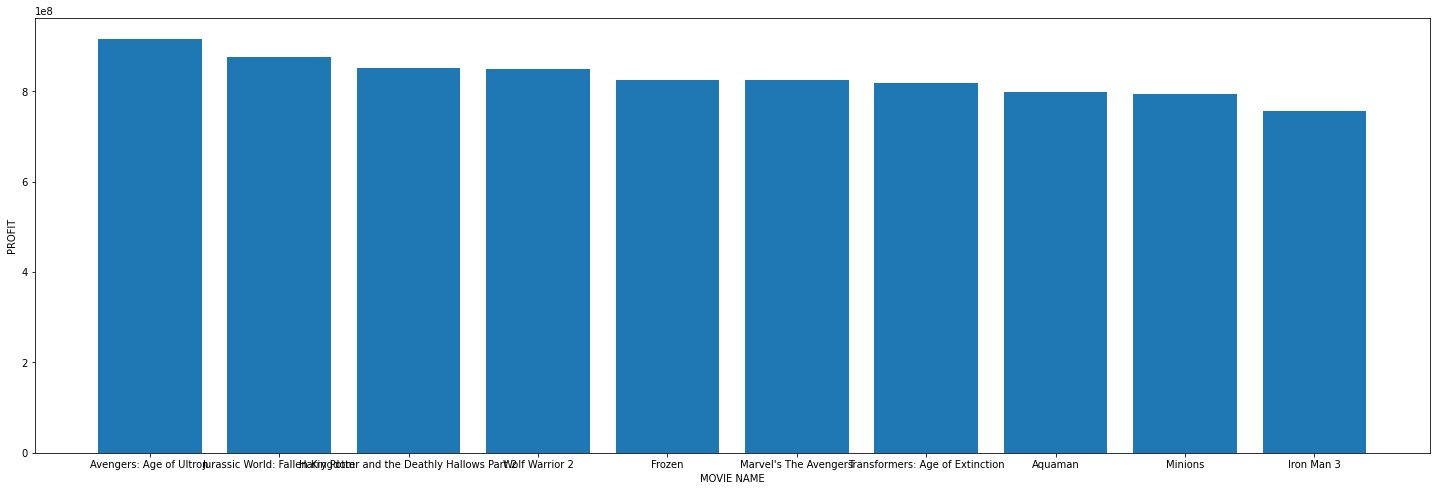

In [508]:
x=list(top_profits['title'])
y=list(top_profits['profit'])
y1=list(top_profits['production_budget'])

fig, ax1 = plt.subplots(figsize=(25, 8))

ax1.bar(x, y)
ax1.set_xlabel('MOVIE NAME')
ax1.set_ylabel('PROFIT')


plt.show()